In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
df = pd.read_csv('data/nyc_centerline.csv')

## Dataset Overview

In [6]:
# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (107653, 14)

First 5 rows:


,id,street,post_type,st_width,bike_lane,bike_traf_dir,traf_dir,rw_type,start_contour,end_contour,snow_pri,region,length,points
0,6110,28 AVE,AVE,35,NaN,NaN,TW,1,13,13,H,Queens,0.049027,40.77780428098228;-73.7729030190404|40.7780698...
1,145494,SCHERMERHORN ST,ST,50,2.0,TW,TW,1,13,13,C,Brooklyn,0.115422,40.687329801759894;-73.98181677514282|40.68689...
2,61140,ARLINGTON AVE,AVE,42,NaN,NaN,TW,1,13,13,C,Bronx,0.086162,40.90518625079211;-73.90711253281893|40.906399...
3,12438,QUEENS BLVD,BLVD,40,NaN,NaN,TF,1,13,13,C,Queens,0.008977,40.71400599781069;-73.8300230194527|40.7139412...
4,15432,ARTHUR KIL RD,RD,36,NaN,NaN,TW,1,13,13,C,Staten Island,0.050801,40.56220197631664;-74.15825784169094|40.561935...


In [7]:
print("\nData types:")
print(df.dtypes)


Data types:
id                 int64
street            object
post_type         object
st_width           int64
bike_lane        float64
bike_traf_dir     object
traf_dir          object
rw_type            int64
start_contour      int64
end_contour        int64
snow_pri          object
region            object
length           float64
points            object
dtype: object


In [8]:
print("\nSummary statistics:")
display(df.describe(include='all'))


Summary statistics:


,id,street,post_type,st_width,bike_lane,bike_traf_dir,traf_dir,rw_type,start_contour,end_contour,snow_pri,region,length,points
count,107653.00000,107653,96177,107653.000000,9657.000000,9657,107653,107653.000000,107653.000000,107653.000000,107546,107653,107653.000000,107653
unique,NaN,9728,59,NaN,NaN,3,3,NaN,NaN,NaN,4,5,NaN,107477
top,NaN,BROADWAY,AVE,NaN,NaN,TW,TW,NaN,NaN,NaN,C,Queens,NaN,40.75867506298769;-73.95869168112483|40.758705...
freq,NaN,689,38135,NaN,NaN,4201,55901,NaN,NaN,NaN,60065,40775,NaN,2
mean,62409.65661,NaN,NaN,34.554151,2.319457,NaN,NaN,1.348889,13.120136,13.120796,NaN,NaN,0.066275,NaN
std,42140.13082,NaN,NaN,11.656756,0.873733,NaN,NaN,1.560468,1.095712,1.089113,NaN,NaN,0.055247,NaN
min,3.00000,NaN,NaN,0.000000,1.000000,NaN,NaN,1.000000,4.000000,4.000000,NaN,NaN,0.000854,NaN
25%,29226.00000,NaN,NaN,30.000000,2.000000,NaN,NaN,1.000000,13.000000,13.000000,NaN,NaN,0.034882,NaN
50%,57721.00000,NaN,NaN,30.000000,2.000000,NaN,NaN,1.000000,13.000000,13.000000,NaN,NaN,0.050156,NaN
75%,87424.00000,NaN,NaN,40.000000,3.000000,NaN,NaN,1.000000,13.000000,13.000000,NaN,NaN,0.088060,NaN


## Data Quality Assessment

In [9]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
id                   0
street               0
post_type        11476
st_width             0
bike_lane        97996
bike_traf_dir    97996
traf_dir             0
rw_type              0
start_contour        0
end_contour          0
snow_pri           107
region               0
length               0
points               0
dtype: int64


Observations:
- `bike_lane` and `bike_traf_dir` have many missing values (appears empty for streets without bike lanes)

In [10]:
print("\nUnique values for categorical columns:")
cat_cols = ['post_type', 'bike_traf_dir', 'traf_dir', 'rw_type', 'bike_lane', 'region']
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))


Unique values for categorical columns:

post_type:
post_type
AVE     38135
ST      31766
NaN     11476
RD       6344
BLVD     6141
PL       3331
DR       2142
PKWY     1980
LN       1216
CT       1100
BRG       799
EXPY      715
TER       436
LOOP      274
APPR      245
CIR       205
TUNL      194
PLZ       141
WAY       131
PARK      104
EN         93
FWY        89
CRES       64
SQ         61
EXT        56
ROAD       48
ROW        30
RAMP       28
HL         25
HWY        25
LK         25
ALY        22
N          20
OVAL       20
TRL        20
TPKE       18
GRN        14
SLIP       14
RMP        13
VLG        12
PATH        9
HTS         9
WALK        8
XING        8
CRSE        8
VIA         6
PT          4
GDNS        4
RDWY        3
CLOS        3
RDG         3
EXIT        3
ESPL        3
GLN         2
OPAS        2
BL          2
MNR         1
DY          1
BDG         1
CP          1
Name: count, dtype: int64

bike_traf_dir:
bike_traf_dir
NaN    97996
TW      4201
FT      2732
TF 

## Feature Engineering Opportunities

1. Bike Lane Features

Potential classifications:
- 1.0: Standard bike lane
- 2.0: Protected bike lane
- 3.0: Buffered bike lane

> Create binary flag for presence of any bike lane

2. Road Type Features

Potential classifications:
- 1: Standard city street
- 2: Highway/expressway
- 3: Bridge
- 4: Tunnel
- 9: Special cases (ramps, etc.)
- 13: U-turn

Road Type Interactions:
> Combine with post_type for more granular classification
> Create flags for special road types (bridges, highways)

3. Elevation Features

Elevation Change: calculate as

`elevation_change = end_contour - start_contour`

Create categorical features:
- Flat: change = 0
- Gentle slope: small change
- Steep slope: large change

Slope Direction:
- Positive vs. negative elevation change

Combine with traffic direction for uphill/downhill analysis

4. Street Classification:
- Could categorize streets by width (narrow, medium, wide)
- Might combine post_type with width for better classification

## Preliminary EDA

### Bike Lane Analysis

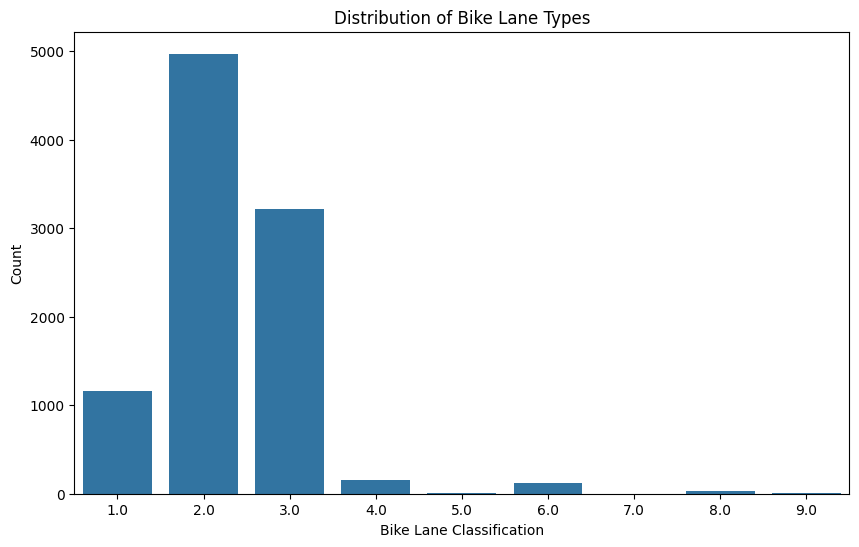

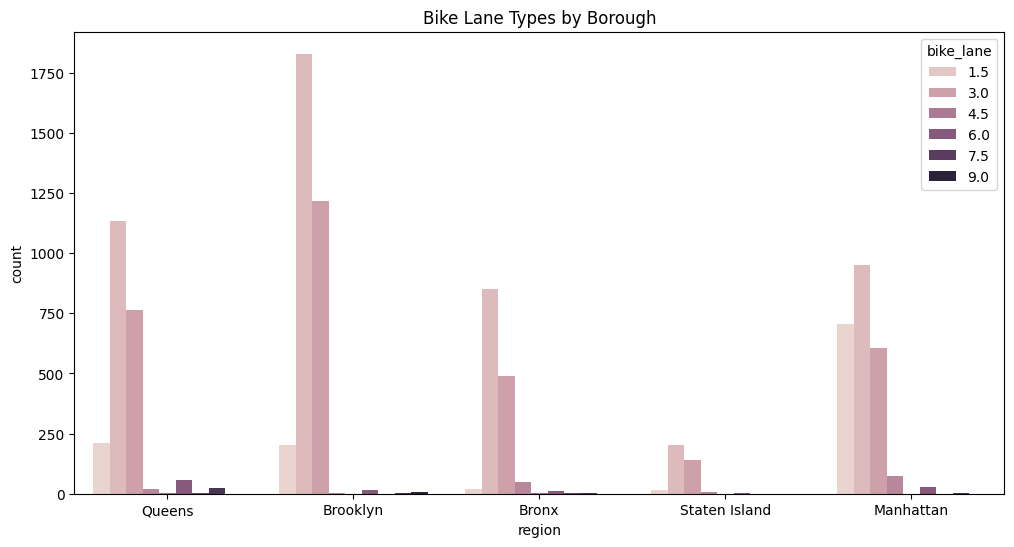

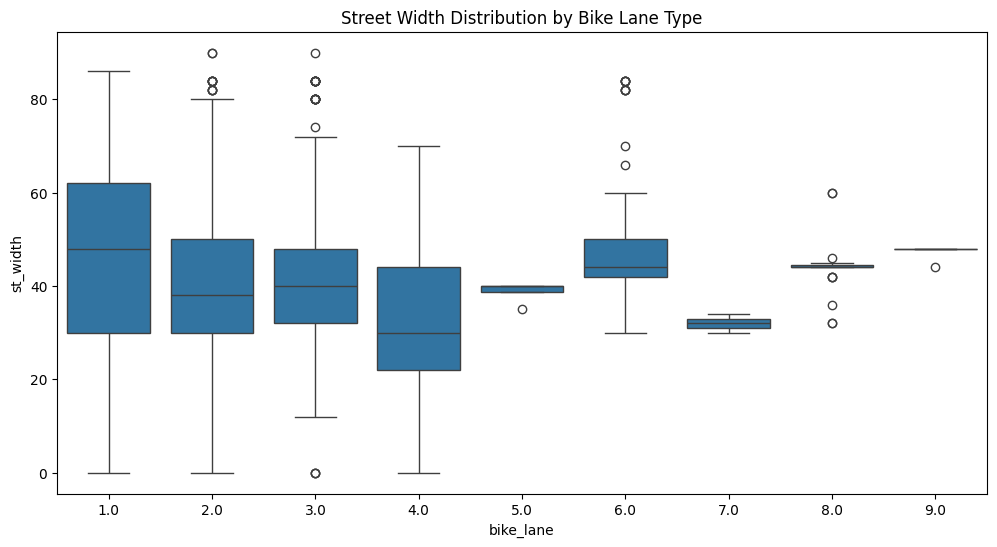

In [13]:
# Bike lane type distribution
plt.figure(figsize=(10,6))
sns.countplot(x='bike_lane', data=df)
plt.title('Distribution of Bike Lane Types')
plt.xlabel('Bike Lane Classification')
plt.ylabel('Count')
plt.show()

# Bike lanes by borough
plt.figure(figsize=(12,6))
sns.countplot(x='region', hue='bike_lane', data=df)
plt.title('Bike Lane Types by Borough')
plt.show()

# Street width vs. bike lane type
plt.figure(figsize=(12,6))
sns.boxplot(x='bike_lane', y='st_width', data=df)
plt.title('Street Width Distribution by Bike Lane Type')
plt.show()

Observations:
- Most bike lanes are type 2.0 (protected lanes)
- Manhattan has the highest variety of bike lane types
- Type 3.0 bike lanes tend to be on wider streets
- Some boroughs have no type 1.0 bike lanes

### Road Type Analysis

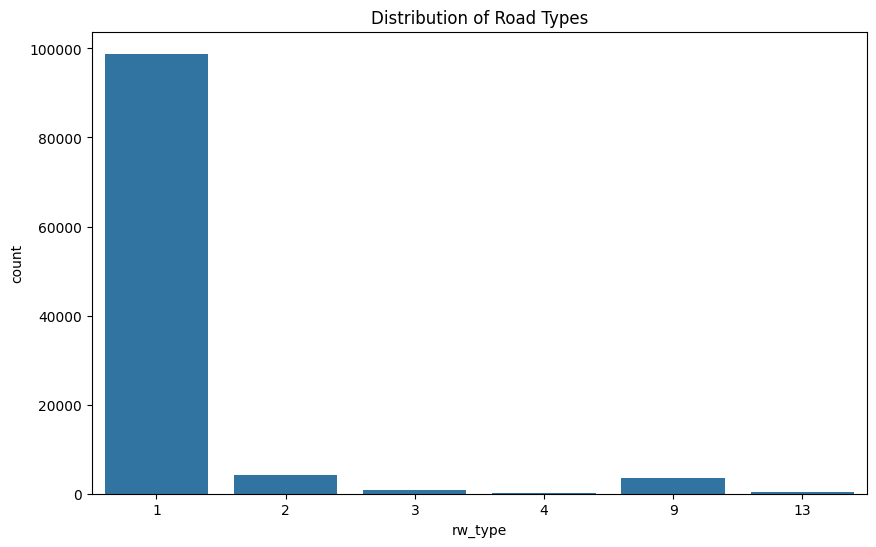

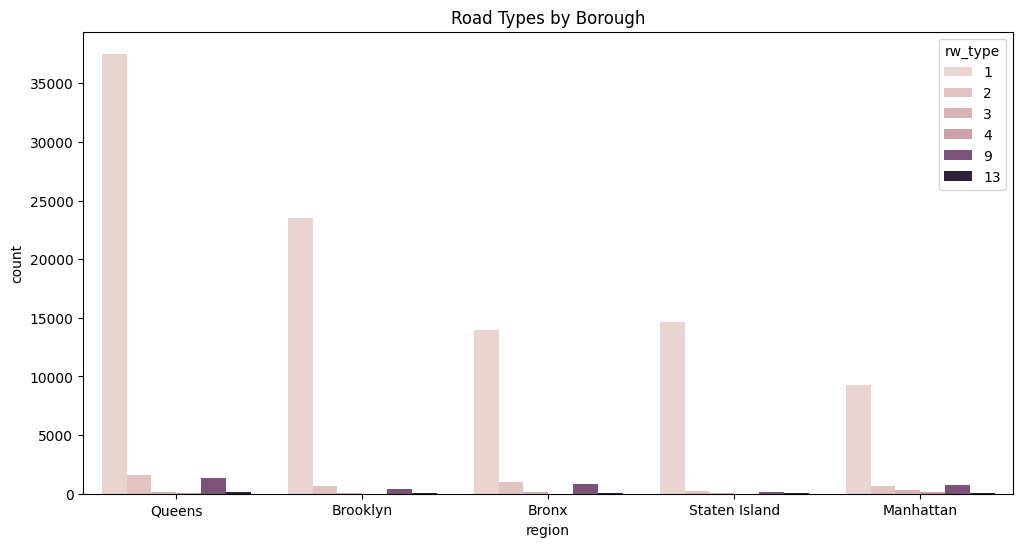

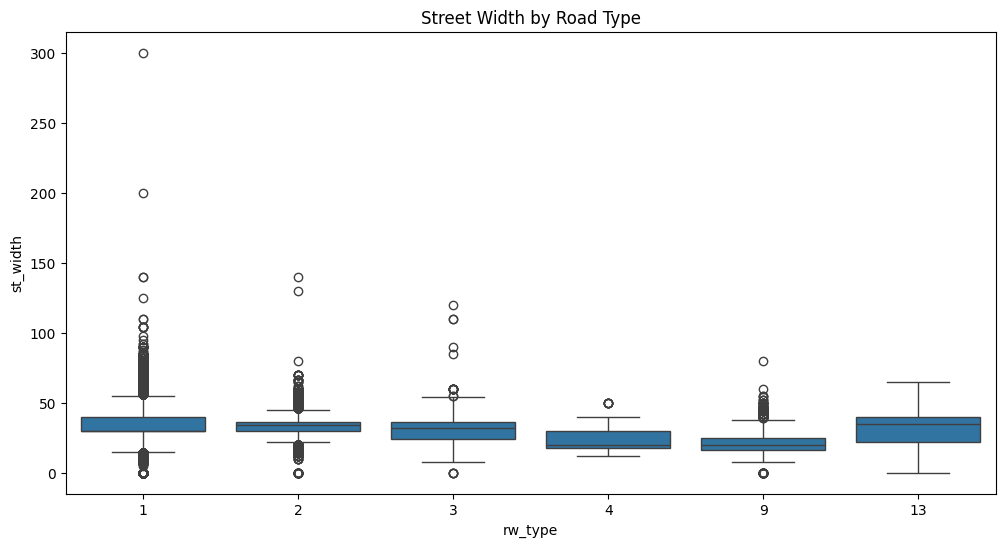

In [16]:
# Road type distribution
plt.figure(figsize=(10,6))
sns.countplot(x='rw_type', data=df)
plt.title('Distribution of Road Types')
plt.show()

# Road type by borough
plt.figure(figsize=(12,6))
sns.countplot(x='region', hue='rw_type', data=df)
plt.title('Road Types by Borough')
plt.show()

# Street width by road type
plt.figure(figsize=(12,6))
sns.boxplot(x='rw_type', y='st_width', data=df)
plt.title('Street Width by Road Type')
plt.show()

Observations:
- Most roads are type 1 (standard city streets)
- Type 2 (highways/expressways) are wider on average

### Elevation Analysis

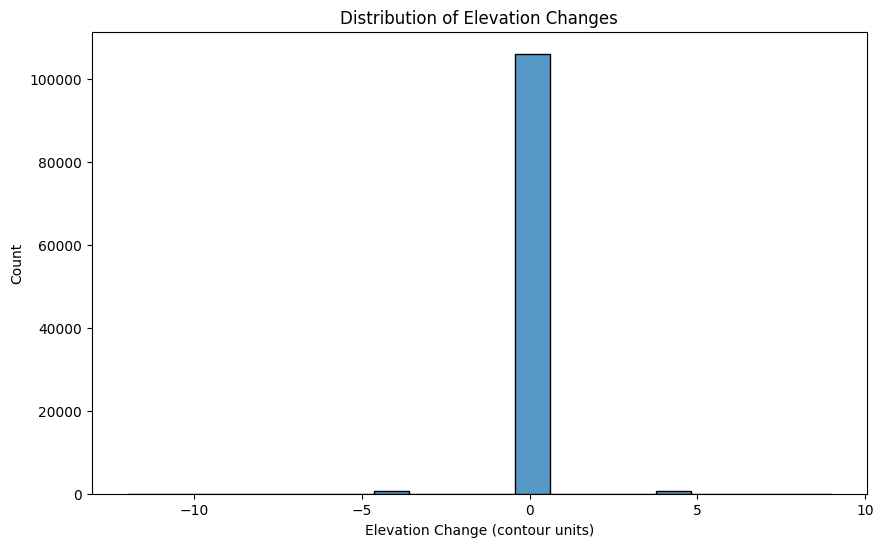

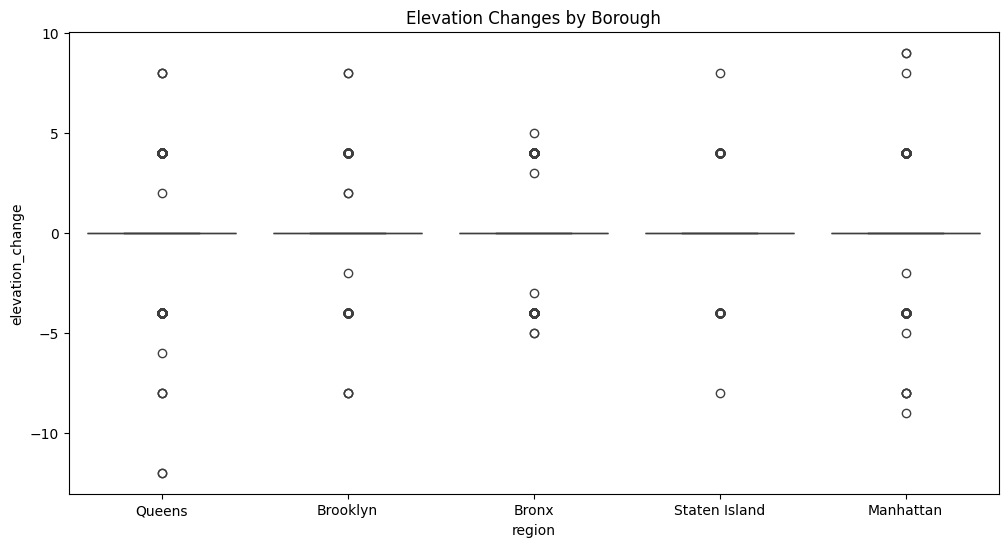

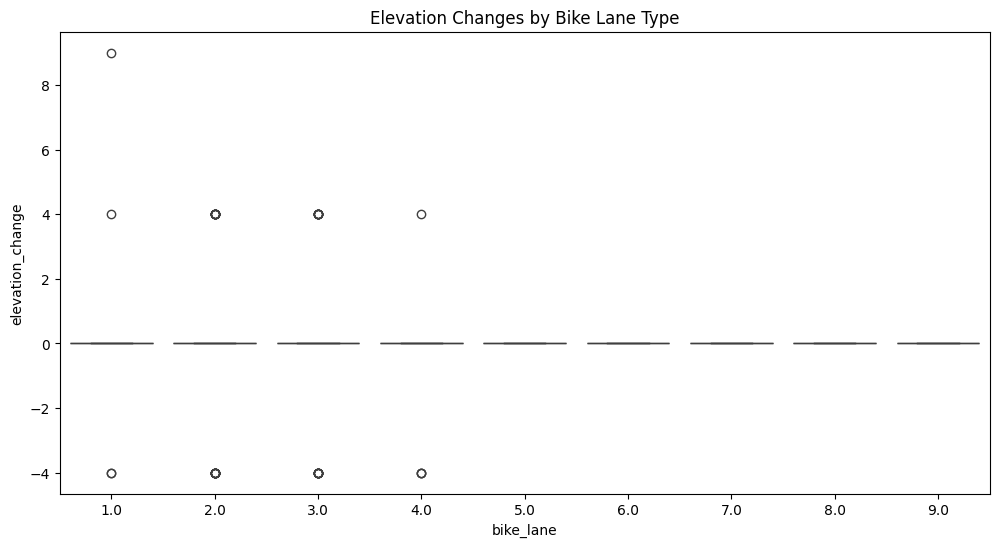

In [17]:
# Calculate elevation change
df['elevation_change'] = df['end_contour'] - df['start_contour']

# Elevation change distribution
plt.figure(figsize=(10,6))
sns.histplot(df['elevation_change'], bins=20)
plt.title('Distribution of Elevation Changes')
plt.xlabel('Elevation Change (contour units)')
plt.show()

# Elevation by borough
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y='elevation_change', data=df)
plt.title('Elevation Changes by Borough')
plt.show()

# Elevation vs. bike lanes
plt.figure(figsize=(12,6))
sns.boxplot(x='bike_lane', y='elevation_change', data=df)
plt.title('Elevation Changes by Bike Lane Type')
plt.show()

Observations:
- Most segments have no elevation change (0)
- Some boroughs show more elevation variation (Queens)
- Bike lanes appear more common on flat terrain
- Steeper segments tend to have no bike lanes

### Combined Analysis

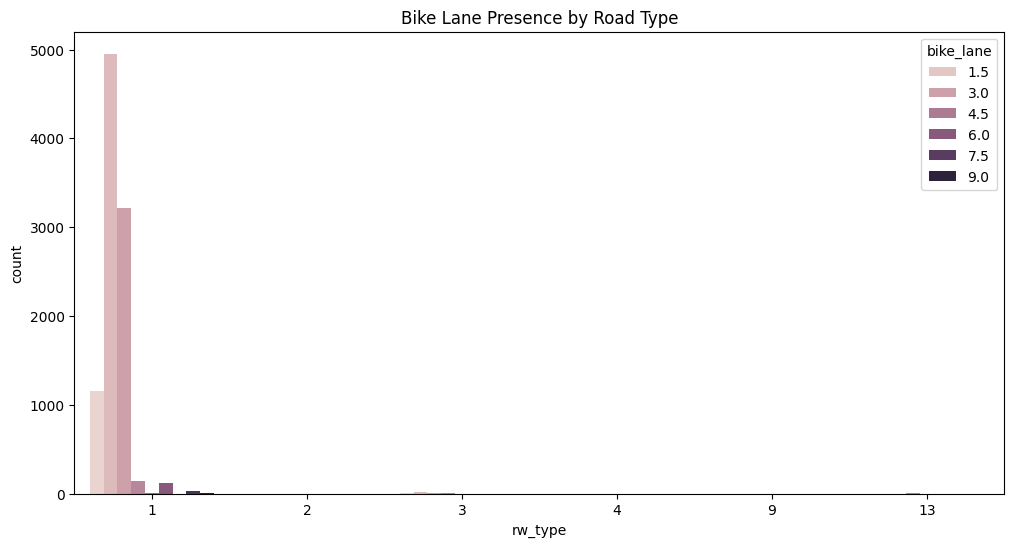

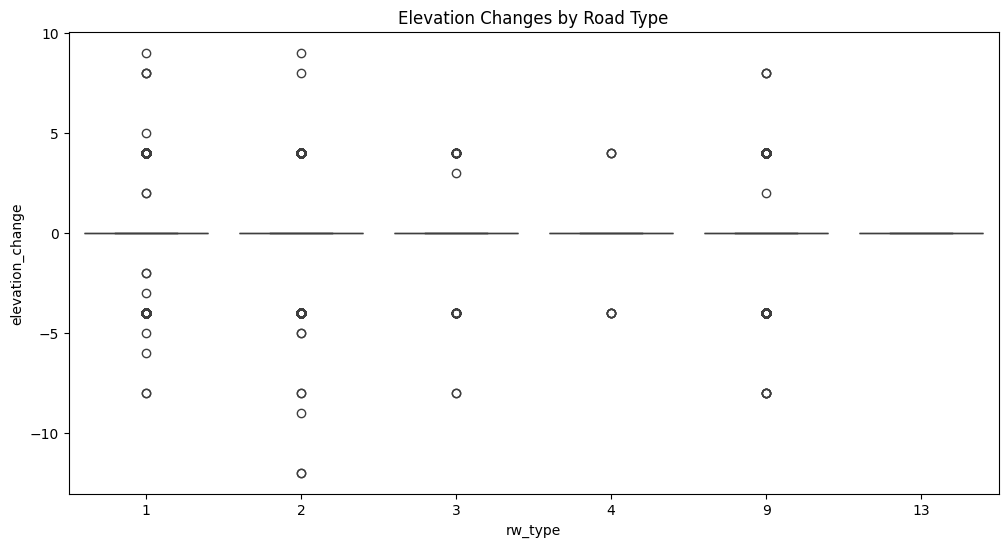

In [20]:
# Bike lanes by road type
plt.figure(figsize=(12,6))
sns.countplot(x='rw_type', hue='bike_lane', data=df)
plt.title('Bike Lane Presence by Road Type')
plt.show()

# Elevation vs. road type
plt.figure(figsize=(12,6))
sns.boxplot(x='rw_type', y='elevation_change', data=df)
plt.title('Elevation Changes by Road Type')
plt.show()

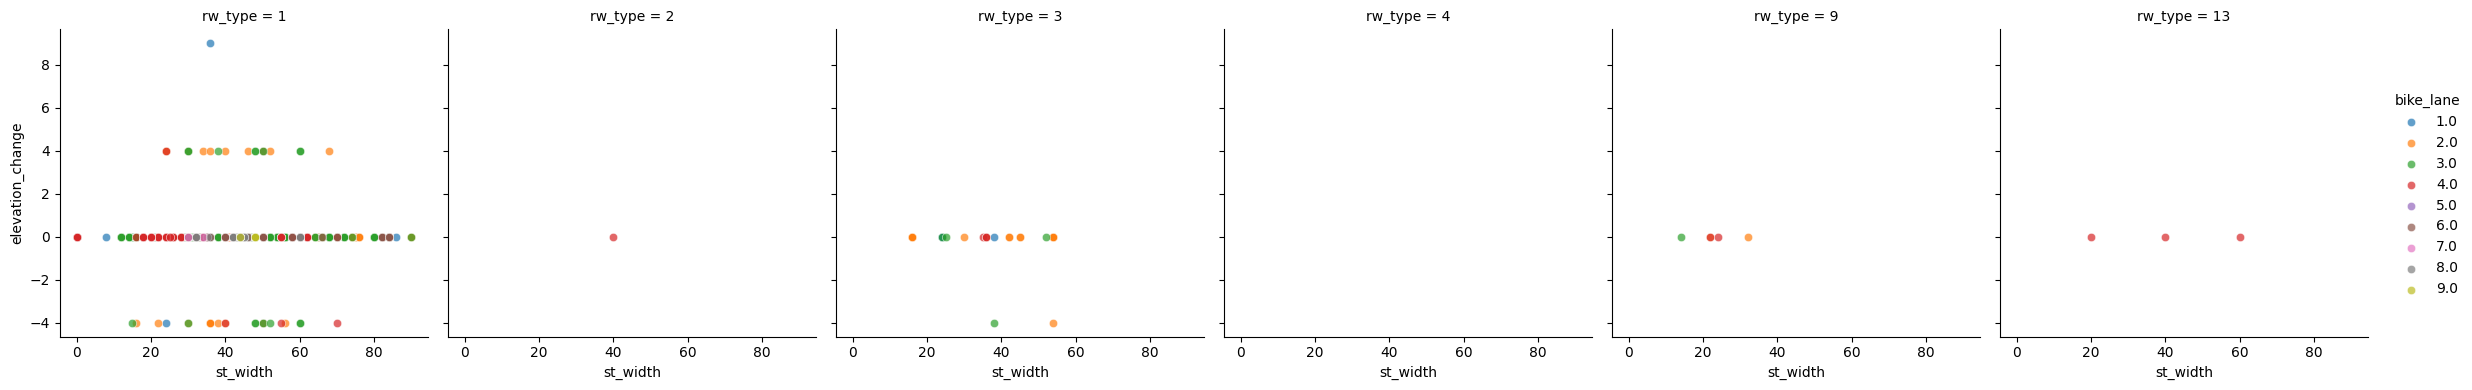

In [21]:
# 3-way relationship: bike lanes, road type, elevation
g = sns.FacetGrid(df, col='rw_type', hue='bike_lane', height=4)
g.map(sns.scatterplot, 'st_width', 'elevation_change', alpha=0.7)
g.add_legend()
plt.show()

Observations:
- Bike lanes primarily exist on standard city streets (rw_type 1)
- Bridges (rw_type 3) show more elevation variation
- Highway segments (rw_type 2) rarely have bike lanes
- Most bike lanes are on medium-width streets with little elevation change

### Key Insights

1. Bike Lane Distribution:
- Protected bike lanes (2.0) are most common
- Bike lanes are concentrated in Manhattan and Brooklyn
- Rare on highways and bridges

2. Road Type Characteristics:
- Standard streets dominate the dataset
- Highways are wider but lack bike infrastructure
- Bridges show unique elevation patterns

3. Elevation Patterns:
- Most city streets are flat
- Boroughs have different elevation profiles
- Bike infrastructure favors flatter terrain

### Potential Hypotheses for Further Testing


1. Bike Lane Placement:
> Hypothesis: Protected bike lanes (2.0) are more likely to be installed on wider streets
- Could test correlation between st_width and bike_lane type

2. Elevation Impact:
> Hypothesis: Streets with significant elevation gain are less likely to have bike lanes
- Could analyze bike lane presence vs. elevation_change

3. Borough Differences:
> Hypothesis: Manhattan has more bike lanes per mile than other boroughs
- Would need to normalize by street length

4. Road Type Suitability:
> Hypothesis: Standard city streets (rw_type 1) are 5x more likely to have bike lanes than other road types
- Could calculate probabilities for each road type